# Gambling Simulation

When playing roulette, some people thing that certain strategies can help them win more often. One common strategy is the Martingale system, where a player doubles their bet after each loss, hoping to recover all previous losses with a single win.
So lets use the following betting strategy:
We just bet on red every time.  We start with the minimum bet.If we win, we collect our winnings and bet the minimum amount again. If we lose, we double our bet for the next round, up to a maximum bet limit. If we reach the maximum bet and lose again, we just bet the maximum amount again.
We will simulate this strategy over a series of rounds and see how it performs.

# Math

There are the numbers 1-36 and 0 (and sometimes 00 but we ignore that here) on a roulette wheel. 18 of the numbers are red, 18 are black and 0 is green. So if we bet on red, we have an 18/37 chance of winning (about 48.65%) and a 19/37 chance of losing (about 51.35%).
But the payout for winning is 1:1, so if we win, we get back our bet plus the same amount again. If we lose, we lose our bet.
Therefore, the expected value of a single bet on red is:
E = (18/37) * (1) + (19/37) * (-1) = -1/37 ≈ -0.027 
This means that on average, for amount of bet, we loose about 2.7% of it over the long run. This is why casinos make money.

But what about our betting strategy? 
When we double our bet after each loss, we can recover all previous losses with a single win. 
So shouldn't this strategy work better?
There are some problems with this strategy:
1. Doubling the bet after each loss can lead to very large bets very quickly. For example, if we start with a bet of 1 unit and lose 10 times in a row, our next bet would be 1024 units. This can quickly exceed our bankroll.
2. Most casinos have maximum bet limits, so we can't keep doubling our bet indefinitely.


Let's simulate it and see how it performs.

In [226]:
import numpy
import random

# Simulate a gambling strategy over a number of rounds
def simulate(bankroll, min_bet, max_bet, num_rounds):

    p_win = 18 / 37
    print(f"Probability of winning on red: {p_win:.4f}")


    current_bet = min_bet

    # for plotting / analysis we keep track of the bankroll over time
    bankroll_history = []
    bet_history = []
    bankrupt = False

    # true random seed
    random.seed()

    for round in range(num_rounds):
        bankroll_history.append(bankroll)
        bet_history.append(current_bet)
        if bankroll < current_bet:
            print(f"Bankrupt after {round} rounds!")
            bankrupt = True
            break

        # Simulate a spin
        if random.random() < p_win:
            # Win
            bankroll += current_bet
            current_bet = min_bet
        else:
            # Lose
            bankroll -= current_bet
            current_bet = min(current_bet * 2, max_bet)
    return bankroll_history, bet_history, bankrupt

In [250]:
import matplotlib.pyplot as plt
# Plotting function
def plot_results(bankroll_history, bet_history, bankrupt, title="Results:"):
    
    fig, ax1 = plt.subplots(figsize=(12, 6))


    bankroll_history = numpy.array(bankroll_history)
    argmax = numpy.argmax(bankroll_history)
    bet_history = numpy.array(bet_history)



    # Plot bankroll on left y-axis
    ax1.plot(bankroll_history, label='Bankroll', color='green')
    # ax1.plot(argmax, bankroll_history[argmax], 'ro', markersize=8, label=f'Max: {bankroll_history[argmax]:.2f}\n(t={argmax})')
    ax1.set_xlabel("Rounds")
    ax1.set_ylabel("Money", color='green')
    ax1.tick_params(axis='y', labelcolor='green')
    ax1.plot(bet_history, label='Current Bet', color='purple', alpha=0.7)
    ax1.legend(loc='upper left')
  
    if bankrupt:
        plt.title(f"{title} bankrupt after {len(bankroll_history)} rounds")
        
    else:
        plt.title(f"{title} won {bankroll_history[-1]-bankroll:.2f} after {len(bankroll_history)} rounds")
    # fig.tight_layout()

    return fig


Probability of winning on red: 0.4865
Bankrupt after 9820 rounds!


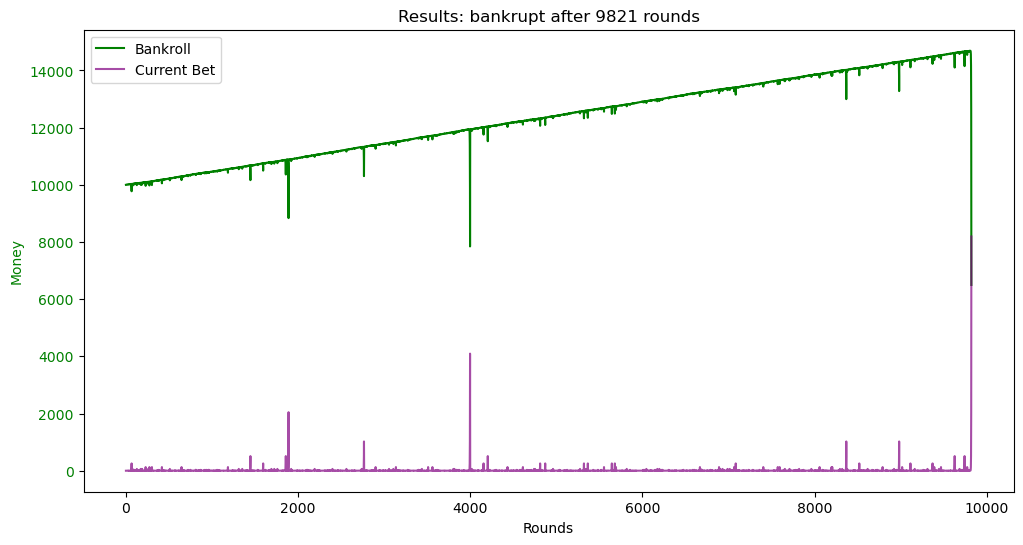

In [ ]:

bankroll = 10000
min_bet = 1
max_bet = 100000000
num_rounds = 10000

bankroll_history, bet_history, bankrupt = simulate(bankroll=bankroll, min_bet=min_bet, max_bet=max_bet, num_rounds=num_rounds)
fig = plot_results(bankroll_history, bet_history, bankrupt)


In [ ]:

bankroll = 10000
min_bet = 1
max_bet = 100
num_rounds = 10000

bankroll_history, bet_history, bankrupt = simulate(bankroll=bankroll, min_bet=min_bet, max_bet=max_bet, num_rounds=num_rounds)
fig = plot_results(bankroll_history, bet_history, bankrupt)
